In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
Countries = ["PL", "GER", "UK", "USA", "CZ", "IT"]
data = {
    "Customer_ID" : np.arange(100000),
    "Age": np.random.randint(low=18, high=80, size=(100000)),
    "Country" : np.random.choice(Countries, 100000),
    "Total_Spend" : np.random.randint(low=50, high=25000, size=(100000))
}
df = pd.DataFrame(data)

#data validation by increasing amount spent based on country's wealth
spend_distribution = {
    "USA": (500, 25000),
    "GER": (400, 20000),
    "UK": (300, 15000),
    "PL": (100, 8000),
    "CZ": (50, 6000),
    "IT": (200, 12000)
}
df["Total_Spend"] = df["Country"].apply(lambda x: np.random.randint(*spend_distribution[x]))


In [28]:
avg_sales_per_country = round(df.groupby("Country")["Total_Spend"].mean().sort_values(ascending=False),2)
avg_sales_per_country

Country
USA    12704.33
GER    10310.94
UK      7629.91
IT      6148.46
PL      4074.18
CZ      3033.93
Name: Total_Spend, dtype: float64

Text(0.5, 1.0, 'Average Spent by Country')

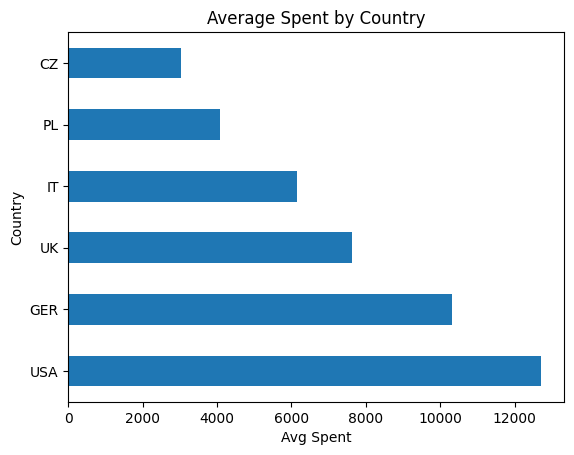

In [31]:
avg_sales_per_country.plot(kind='barh')
plt.xlabel("Avg Spent")
plt.title("Average Spent by Country")


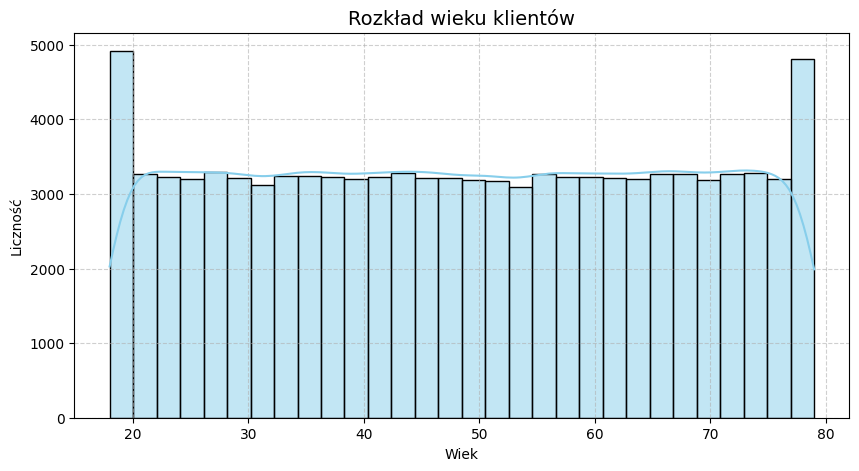

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Rozkład wieku klientów", fontsize=14)
plt.xlabel("Wiek")
plt.ylabel("Liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [42]:
top_revenue_by_country = df.groupby("Country")["Total_Spend"].sum().sort_values(ascending=False)
top_revenue_country = top_revenue_by_country.idxmax()
top_revenue = top_revenue_by_country.max()
top_revenue_by_country

Country
USA    211654114
GER    172450479
UK     126244538
IT     102543997
PL      68026580
CZ      50648485
Name: Total_Spend, dtype: int64

In [43]:
print(f"Country with biggest revenue: {top_revenue_country}, with revenue of: {top_revenue}")

Country with biggest revenue: USA, with revenue of: 211654114
